Nick is a great devops engineer!

In [1]:
conda update -n base -c defaults conda

Solving environment: done

## Package Plan ##

  environment location: /anaconda

  added / updated specs: 
    - conda


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    conda-package-handling-1.6.1|   py37h7b6447c_0         886 KB
    conda-4.8.4                |           py37_0         3.0 MB
    pyopenssl-19.1.0           |             py_1          47 KB
    cffi-1.14.2                |   py37he30daa8_0         228 KB
    requests-2.24.0            |             py_0          54 KB
    cryptography-3.0           |   py37h1ba5d50_0         646 KB
    brotlipy-0.7.0             |py37h7b6447c_1000         348 KB
    urllib3-1.25.10            |             py_0          93 KB
    ------------------------------------------------------------
                                           Total:         5.3 MB

The following NEW packages will be INSTALLED:

    brotlipy:               0.7.0-p

In [1]:
!conda update --yes scikit-learn

Solving environment: | 
The environment is inconsistent, please check the package plan carefully
The following packages are causing the inconsistency:

  - defaults/linux-64::keyring==17.0.0=py37_0
  - defaults/linux-64::cairo==1.14.12=h8948797_3
  - defaults/linux-64::blaze==0.11.3=py37_0
  - defaults/linux-64::pyqt==5.9.2=py37h05f1152_2
  - defaults/linux-64::harfbuzz==1.8.8=hffaf4a1_0
  - defaults/linux-64::dbus==1.13.2=h714fa37_1
  - defaults/linux-64::glib==2.56.2=hd408876_0
  - defaults/linux-64::seaborn==0.9.0=py37_0
  - defaults/linux-64::gstreamer==1.14.0=hb453b48_1
  - defaults/linux-64::jupyter==1.0.0=py37_7
  - defaults/linux-64::navigator-updater==0.2.1=py37_0
  - defaults/linux-64::spyder==3.3.2=py37_0
  - defaults/linux-64::scikit-image==0.14.1=py37he6710b0_0
  - defaults/linux-64::pango==1.42.4=h049681c_0
  - defaults/linux-64::secretstorage==3.1.0=py37_0
  - defaults/linux-64::qtconsole==4.4.3=py37_0
  - defaults/linux-64::numba==0.41.0=py37h962f231_0
  - defaults/linu

In [2]:
!conda list scikit-learn # to see which scikit-learn version is installed
!conda list # to see all packages installed in the active conda environment
!python -c "import sklearn; sklearn.show_versions()"

# packages in environment at /anaconda:
#
# Name                    Version                   Build  Channel
scikit-learn              0.23.2           py37h0573a6f_0  
# packages in environment at /anaconda:
#
# Name                    Version                   Build  Channel
_anaconda_depends         2019.10                  py37_0  
_ipyw_jlab_nb_ext_conf    0.1.0                    py37_0  
_libgcc_mutex             0.1                        main  
alabaster                 0.7.12                   py37_0  
anaconda                  custom                   py37_1  
anaconda-client           1.7.2                    py37_0  
anaconda-navigator        1.9.6                    py37_0  
anaconda-project          0.8.4                      py_0  
applicationinsights       0.11.9                   pypi_0    pypi
argon2-cffi               20.1.0           py37h7b6447c_1  
asn1crypto                1.4.0                      py_0  
astroid                   2.4.2                    py37_

In [1]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.23.2.


In [2]:
###################################
##### Supervised learning to predict a continuous outcome
##### Evaluate and compare a battery of 8 supervised learning algorithms
##### Originated by Matthew Ye, June 2020
##### QC and modified by Chelsea Jue Jin, Aug 27, 2020
###################################


#import libraries

import numpy as np
import pandas as pd
from pandas import read_csv
from random import random
from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter
from mpl_toolkits.mplot3d import Axes3D

import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import LinearSVR
from sklearn.metrics import make_scorer, accuracy_score, confusion_matrix
from sklearn.inspection import permutation_importance
from sklearn.inspection import partial_dependence

import warnings
warnings.filterwarnings('ignore')

The scikit-learn version is 0.23.2.


In [3]:
file = 'COVIDdata_cj08272020.csv'  # 'UI/08-30-2020_012102_UTC/
data = read_csv(file)
print(data.shape)
print(data.describe())
print(74*'-')
print(data.head())

(51, 248)
       mortality_rate_2  mortality_rate  CLASS01_TOPIC03_DRNKANY5_RESP046_BO1  \
count         51.000000       51.000000                             51.000000   
mean           2.867864        3.014398                             53.120196   
std            1.984502        1.242225                              7.560503   
min            0.702479        0.000000                             29.700000   
25%            1.483322        2.142745                             49.430000   
50%            2.038067        2.857143                             53.830000   
75%            3.539780        3.893062                             58.710000   
max            8.546534        6.100478                             66.710000   

       CLASS01_TOPIC03_DRNKANY5_RESP054_BO1  \
count                             51.000000   
mean                              46.879804   
std                                7.560503   
min                               33.290000   
25%                      

# azureml-core of version 1.0.72 or higher is required
from azureml.core import Workspace, Dataset

subscription_id = '23eed54f-ae8e-4d9c-af19-85b4d6a23ba0'
resource_group = 'test_vm'
workspace_name = 'BrianAzureML'

workspace = Workspace(subscription_id, resource_group, workspace_name)

dataset = Dataset.get_by_name(workspace, name='covid_data')
dataset.download(target_path='.', overwrite=False)

In [ ]:
### import and explore the data
'''
data = pd.read_csv('/mnt/a.csv')
print(data.shape)
data.head()'''

In [4]:
### remove records and features

# drop the records of Guam and Puerto Rico because they were not in a couple of surveys
# data.drop([33, 47], inplace=True) # Get rid of Guam/Puerto Rico
data = data[(data.state!="GU") & (data.state!="PR")]
print(data.shape)

# create the outcome measurement - mortality rate; record state for being looked up later
y = data['mortality_rate'] # Labels
print(len(y))
y2 = data['mortality_rate_2'] # Labels
print(len(y2))
states = data['state'] # If we want to look a state up later
print(len(states))

# drop a few features and leave 242 predictors
print(data.dtypes)


data.drop(['mortality_rate', 'mortality_rate_2', 'Locationdesc', 'state'], axis='columns', inplace=True)
           
'''          
           'country_region', 'last_update', 'lat', 'long', 'confirmed', 'deaths',
                  'recovered', 'active', 'people_tested', 'people_hospitalized', 'testing_rate', 'incident_rate', 'hospitalization_rate',
                  'state'], axis='columns', inplace=True)

Locationdesc
mortality_rate_2
state
mortality_rate
CLASS01_TOPIC03_DRNKANY5_RESP046_BO1
CLASS01_TOPIC03_DRNKANY5_RESP054_BO1
CLASS01_TOPIC07__RFBING5_RESP046_BO1
CLASS01_TOPIC07__RFBING5_RESP054_BO1
CLASS01_TOPIC30__RFDRHV6_RESP205_BO1
CLASS01_TOPIC30__RFDRHV6_RESP206_BO1
CLASS03_TOPIC05__DRDXAR1_RESP046_BO1
CLASS03_TOPIC05__DRDXAR1_RESP054_BO1
CLASS03_TOPIC06__CASTHM1_RESP046_BO1
CLASS03_TOPIC06__CASTHM1_RESP054_BO1
CLASS03_TOPIC06__LTASTH1_RESP046_BO1
CLASS03_TOPIC06__LTASTH1_RESP054_BO1
CLASS03_TOPIC10_CVDCRHD4_RESP046_BO1
CLASS03_TOPIC10_CVDCRHD4_RESP054_BO1
CLASS03_TOPIC10_CVDINFR4_RESP046_BO1
CLASS03_TOPIC10_CVDINFR4_RESP054_BO1
CLASS03_TOPIC10_CVDSTRK3_RESP046_BO1
CLASS03_TOPIC10_CVDSTRK3_RESP054_BO1
CLASS03_TOPIC10__MICHD_RESP203_BO1
CLASS03_TOPIC10__MICHD_RESP204_BO1
CLASS03_TOPIC14_CHCCOPD1_RESP046_BO1
CLASS03_TOPIC14_CHCCOPD1_RESP054_BO1
CLASS03_TOPIC17_ADDEPEV2_RESP046_BO1
CLASS03_TOPIC17_ADDEPEV2_RESP054_BO1
CLASS03_TOPIC18_DIABETE3_RESP046_BO1
CLASS03_TOPIC18_DIABETE3_RESP051_BO1
CLASS03_TOPIC18_DIABETE3_RESP052_BO1
CLASS03_TOPIC18_DIABETE3_RESP054_BO1
CLASS03_TOPIC35_CHCKDNY1_RESP046_BO1
CLASS03_TOPIC35_CHCKDNY1_RESP054_BO1
CLASS03_TOPIC40_CHCOCNCR_RESP046_BO1
CLASS03_TOPIC40_CHCOCNCR_RESP054_BO1
CLASS03_TOPIC53_CHCSCNCR_RESP046_BO1
CLASS03_TOPIC53_CHCSCNCR_RESP054_BO1
CLASS04_TOPIC08__FOBTFS_RESP209_BO1
CLASS04_TOPIC08__FOBTFS_RESP210_BO1
CLASS04_TOPIC08__RFBLDS3_RESP190_BO1
CLASS04_TOPIC08__RFBLDS3_RESP191_BO1
CLASS04_TOPIC52__FS5YR_RESP211_BO1
CLASS04_TOPIC52__FS5YR_RESP212_BO1
CLASS04_TOPIC64__CRCREC_RESP192_BO1
CLASS04_TOPIC64__CRCREC_RESP193_BO1
CLASS04_TOPIC68__COL10YR_RESP207_BO1
CLASS04_TOPIC68__COL10YR_RESP208_BO1
CLASS05_TOPIC02_AGE_RESP010_BO1
CLASS05_TOPIC02_AGE_RESP011_BO1
CLASS05_TOPIC02_AGE_RESP012_BO1
CLASS05_TOPIC02_AGE_RESP013_BO1
CLASS05_TOPIC02_AGE_RESP014_BO1
CLASS05_TOPIC02_AGE_RESP015_BO1
CLASS05_TOPIC19_BLIND_RESP046_BO1
CLASS05_TOPIC19_BLIND_RESP054_BO1
CLASS05_TOPIC19_DECIDE_RESP046_BO1
CLASS05_TOPIC19_DECIDE_RESP054_BO1
CLASS05_TOPIC19_DIFFALON_RESP046_BO1
CLASS05_TOPIC19_DIFFALON_RESP054_BO1
CLASS05_TOPIC19_DIFFDRES_RESP046_BO1
CLASS05_TOPIC19_DIFFDRES_RESP054_BO1
CLASS05_TOPIC19_DIFFWALK_RESP046_BO1
CLASS05_TOPIC19_DIFFWALK_RESP054_BO1
CLASS05_TOPIC21_EDUCA_RESP021_BO1
CLASS05_TOPIC21_EDUCA_RESP022_BO1
CLASS05_TOPIC21_EDUCA_RESP023_BO1
CLASS05_TOPIC21_EDUCA_RESP024_BO1
CLASS05_TOPIC22_EMPLOY1_RESP027_BO1
CLASS05_TOPIC22_EMPLOY1_RESP028_BO1
CLASS05_TOPIC22_EMPLOY1_RESP030_BO1
CLASS05_TOPIC22_EMPLOY1_RESP031_BO1
CLASS05_TOPIC22_EMPLOY1_RESP032_BO1
CLASS05_TOPIC22_EMPLOY1_RESP137_BO1
CLASS05_TOPIC22_EMPLOY1_RESP141_BO1
CLASS05_TOPIC22_EMPLOY1_RESP172_BO1
CLASS05_TOPIC33_INCOME_RESP016_BO1
CLASS05_TOPIC33_INCOME_RESP017_BO1
CLASS05_TOPIC33_INCOME_RESP018_BO1
CLASS05_TOPIC33_INCOME_RESP019_BO1
CLASS05_TOPIC33_INCOME_RESP020_BO1
CLASS05_TOPIC38_MARITAL_RESP033_BO1
CLASS05_TOPIC38_MARITAL_RESP034_BO1
CLASS05_TOPIC38_MARITAL_RESP035_BO1
CLASS05_TOPIC38_MARITAL_RESP036_BO1
CLASS05_TOPIC38_MARITAL_RESP037_BO1
CLASS05_TOPIC38_MARITAL_RESP038_BO1
CLASS05_TOPIC39__CHLDCNT_RESP090_BO1
CLASS05_TOPIC39__CHLDCNT_RESP091_BO1
CLASS05_TOPIC39__CHLDCNT_RESP092_BO1
CLASS05_TOPIC39__CHLDCNT_RESP093_BO1
CLASS05_TOPIC39__CHLDCNT_RESP094_BO1
CLASS05_TOPIC39__CHLDCNT_RESP095_BO1
CLASS05_TOPIC48_RACE8_RESP007_BO1
CLASS05_TOPIC48_RACE8_RESP194_BO1
CLASS05_TOPIC48_RACE8_RESP195_BO1
CLASS05_TOPIC48_RACE8_RESP196_BO1
CLASS05_TOPIC48_RACE8_RESP197_BO1
CLASS05_TOPIC48_RACE8_RESP198_BO1
CLASS05_TOPIC48_RACE8_RESP199_BO1
CLASS05_TOPIC48_RACE8_RESP200_BO1
CLASS05_TOPIC49_RENTHOM1_RESP003_BO1
CLASS05_TOPIC49_RENTHOM1_RESP004_BO1
CLASS05_TOPIC49_RENTHOM1_RESP009_BO1
CLASS05_TOPIC51_SEX_RESP001_BO1
CLASS05_TOPIC51_SEX_RESP002_BO1
CLASS05_TOPIC61_VETERAN3_RESP046_BO1
CLASS05_TOPIC61_VETERAN3_RESP054_BO1
CLASS05_TOPIC70_DEAF_RESP046_BO1
CLASS05_TOPIC70_DEAF_RESP054_BO1
CLASS07_TOPIC28_MEDCOST_RESP046_BO1
CLASS07_TOPIC28_MEDCOST_RESP054_BO1
CLASS07_TOPIC29_HLTHPLN1_RESP046_BO1
CLASS07_TOPIC29_HLTHPLN1_RESP054_BO1
CLASS07_TOPIC36_CHECKUP1_RESP063_BO1
CLASS07_TOPIC36_CHECKUP1_RESP064_BO1
CLASS07_TOPIC36_CHECKUP1_RESP065_BO1
CLASS07_TOPIC36_CHECKUP1_RESP066_BO1
CLASS07_TOPIC36_CHECKUP1_RESP067_BO1
CLASS07_TOPIC43_PERSDOC2_RESP050_BO1
CLASS07_TOPIC43_PERSDOC2_RESP053_BO1
CLASS07_TOPIC43_PERSDOC2_RESP054_BO1
CLASS07_TOPIC59__HCVU651_RESP046_BO1
CLASS07_TOPIC59__HCVU651_RESP054_BO1
CLASS08_TOPIC24__RFHLTH_RESP061_BO1
CLASS08_TOPIC24__RFHLTH_RESP062_BO1
CLASS08_TOPIC41_GENHLTH_RESP056_BO1
CLASS08_TOPIC41_GENHLTH_RESP057_BO1
CLASS08_TOPIC41_GENHLTH_RESP058_BO1
CLASS08_TOPIC41_GENHLTH_RESP059_BO1
CLASS08_TOPIC41_GENHLTH_RESP060_BO1
CLASS09_TOPIC32_HIVTST6_RESP046_BO1
CLASS09_TOPIC32_HIVTST6_RESP054_BO1
CLASS11_TOPIC26__FLSHOT6_RESP046_BO1
CLASS11_TOPIC26__FLSHOT6_RESP054_BO1
CLASS11_TOPIC46__PNEUMO3_RESP046_BO1
CLASS11_TOPIC46__PNEUMO3_RESP054_BO1
CLASS12_TOPIC20__DRNKDRV_RESP201_BO1
CLASS12_TOPIC20__DRNKDRV_RESP202_BO1
CLASS12_TOPIC50__RFSEAT2_RESP046_BO1
CLASS12_TOPIC50__RFSEAT2_RESP054_BO1
CLASS13_TOPIC04__ALTETH3_RESP046_BO1
CLASS13_TOPIC04__ALTETH3_RESP054_BO1
CLASS13_TOPIC16__DENVST3_RESP046_BO1
CLASS13_TOPIC16__DENVST3_RESP054_BO1
CLASS13_TOPIC57__EXTETH3_RESP046_BO1
CLASS13_TOPIC57__EXTETH3_RESP054_BO1
CLASS14_TOPIC09__BMI5CAT_RESP039_BO1
CLASS14_TOPIC09__BMI5CAT_RESP040_BO1
CLASS14_TOPIC09__BMI5CAT_RESP041_BO1
CLASS14_TOPIC09__BMI5CAT_RESP042_BO1
CLASS15_TOPIC23__TOTINDA_RESP046_BO1
CLASS15_TOPIC23__TOTINDA_RESP054_BO1
CLASS16_TOPIC47__RFPSA22_RESP046_BO1
CLASS16_TOPIC47__RFPSA22_RESP054_BO1
CLASS17_TOPIC15__RFSMOK3_RESP046_BO1
CLASS17_TOPIC15__RFSMOK3_RESP054_BO1
CLASS17_TOPIC54_USENOW3_RESP079_BO1
CLASS17_TOPIC54_USENOW3_RESP080_BO1
CLASS17_TOPIC54_USENOW3_RESP081_BO1
CLASS17_TOPIC55__SMOKER3_RESP068_BO1
CLASS17_TOPIC55__SMOKER3_RESP069_BO1
CLASS17_TOPIC55__SMOKER3_RESP070_BO1
CLASS17_TOPIC55__SMOKER3_RESP071_BO1
CLASS18_TOPIC37__MAM5022_RESP186_BO1
CLASS18_TOPIC37__MAM5022_RESP187_BO1
CLASS18_TOPIC37__RFMAM21_RESP046_BO1
CLASS18_TOPIC37__RFMAM21_RESP054_BO1
CLASS18_TOPIC42__RFPAP34_RESP188_BO1
CLASS18_TOPIC42__RFPAP34_RESP189_BO1
years_of_potential_life_lost_rate
percent_fair_or_poor_health
average_number_of_physically_unhealthy_days
average_number_of_mentally_unhealthy_days
percent_low_birthweight
percent_smokers
percent_adults_with_obesity
food_environment_index
percent_physically_inactive
percent_with_access_to_exercise_opportunities
percent_excessive_drinking
percent_driving_deaths_with_alcohol_involvement
chlamydia_rate
teen_birth_rate
percent_uninsured
primary_care_physicians_rate
dentist_rate
mental_health_provider_rate
preventable_hospitalization_rate
percent_with_annual_mammogram
percent_vaccinated
high_school_graduation_rate
percent_some_college
percent_unemployed
percent_children_in_poverty
80th_percentile_income
20th_percentile_income
income_ratio
percent_single_parent_households
social_association_rate
violent_crime_rate
injury_death_rate
percent_severe_housing_problems
percent_drive_alone_to_work
percent_long_commute_drives_alone
life_expectancy
age_adjusted_death_rate
child_mortality_rate
infant_mortality_rate
percent_frequent_physical_distress
percent_frequent_mental_distress
percent_adults_with_diabetes
percent_food_insecure
percent_limited_access_to_healthy_foods
drug_overdose_mortality_rate
motor_vehicle_mortality_rate
percent_insufficient_sleep
percent_uninsured_2
percent_uninsured_3
other_primary_care_provider_rate
percent_disconnected_youth
average_grade_performance
average_grade_performance_2
median_household_income
segregation_index
segregation_index_2
homicide_rate
suicide_rate_age_adjusted
crude_rate
firearm_fatalities_rate
average_traffic_volume_per_meter_of_major_roadways
percent_homeowners
percent_severe_housing_cost_burden
percent_less_than_18_years_of_age
percent_65_and_over
percent_black
percent_american_indian_alaska_native
percent_asian
percent_native_hawaiian_other_pacific_islander
percent_hispanic
percent_non_hispanic_white
percent_not_proficient_in_english
percent_female
percent_rural
hospital_bed_occupancy_rate
icu_bed_occupancy_rate
mortality_diff
mortality_diffcat

data.drop(columns=['mortality_rate', 'Locationdesc', 'country_region', 'last_update', 'lat', 'long', 'confirmed', 'deaths',
                  'recovered', 'active', 'people_tested', 'people_hospitalized', 'testing_rate', 'incident_rate', 'hospitalization_rate',
                  'state'], axis=1, inplace=True)'''
print(data.shape)
print(data.describe())

(51, 248)
51
51
51
Locationdesc                                           object
mortality_rate_2                                      float64
state                                                  object
mortality_rate                                        float64
CLASS01_TOPIC03_DRNKANY5_RESP046_BO1                  float64
CLASS01_TOPIC03_DRNKANY5_RESP054_BO1                  float64
CLASS01_TOPIC07__RFBING5_RESP046_BO1                  float64
CLASS01_TOPIC07__RFBING5_RESP054_BO1                  float64
CLASS01_TOPIC30__RFDRHV6_RESP205_BO1                  float64
CLASS01_TOPIC30__RFDRHV6_RESP206_BO1                  float64
CLASS03_TOPIC05__DRDXAR1_RESP046_BO1                  float64
CLASS03_TOPIC05__DRDXAR1_RESP054_BO1                  float64
CLASS03_TOPIC06__CASTHM1_RESP046_BO1                  float64
CLASS03_TOPIC06__CASTHM1_RESP054_BO1                  float64
CLASS03_TOPIC06__LTASTH1_RESP046_BO1                  float64
CLASS03_TOPIC06__LTASTH1_RESP054_BO1               

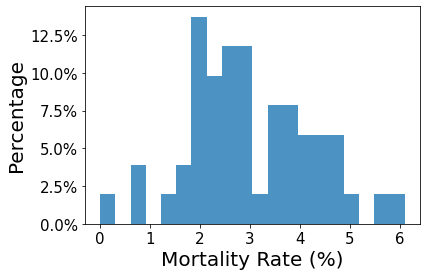

       mortality_rate
count       51.000000
mean         3.014398
std          1.242225
min          0.000000
25%          2.142745
50%          2.857143
75%          3.893062
max          6.100478
0.25    2.142745
0.50    2.857143
0.70    3.713893
0.75    3.893062
0.80    4.078660
Name: mortality_rate, dtype: float64


In [5]:
# explore the distribution of y

plt.hist(y, weights=np.ones(len(y))/len(y), bins = 20, alpha = 0.8)
plt.title("")
plt.xlabel("Mortality Rate (%)", fontsize=20)
plt.ylabel("Percentage", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

Y = pd.DataFrame(y)
print(Y.describe())

print(y.quantile([0.25,0.5,0.7,0.75,0.8]))

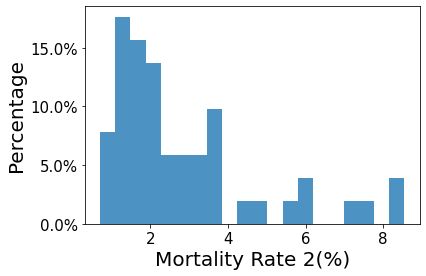

       mortality_rate_2
count         51.000000
mean           2.867864
std            1.984502
min            0.702479
25%            1.483322
50%            2.038067
75%            3.539780
max            8.546534
0.25    1.483322
0.50    2.038067
0.70    3.439243
0.75    3.539780
0.80    3.647086
Name: mortality_rate_2, dtype: float64


In [6]:
# explore the distribution of y

plt.hist(y2, weights=np.ones(len(y2))/len(y2), bins = 20, alpha = 0.8)
plt.title("")
plt.xlabel("Mortality Rate 2(%)", fontsize=20)
plt.ylabel("Percentage", fontsize=20)
plt.tick_params(axis='both', which='major', labelsize=15)
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.show()

Y2 = pd.DataFrame(y2)
print(Y2.describe())

print(y2.quantile([0.25,0.5,0.7,0.75,0.8]))

In [7]:
### use means to impute the missing values of the features with missing records

data.fillna(data.mean(), inplace=True)
data.describe()

,CLASS01_TOPIC03_DRNKANY5_RESP046_BO1,CLASS01_TOPIC03_DRNKANY5_RESP054_BO1,CLASS01_TOPIC07__RFBING5_RESP046_BO1,CLASS01_TOPIC07__RFBING5_RESP054_BO1,CLASS01_TOPIC30__RFDRHV6_RESP205_BO1,CLASS01_TOPIC30__RFDRHV6_RESP206_BO1,CLASS03_TOPIC05__DRDXAR1_RESP046_BO1,CLASS03_TOPIC05__DRDXAR1_RESP054_BO1,CLASS03_TOPIC06__CASTHM1_RESP046_BO1,CLASS03_TOPIC06__CASTHM1_RESP054_BO1,...,percent_native_hawaiian_other_pacific_islander,percent_hispanic,percent_non_hispanic_white,percent_not_proficient_in_english,percent_female,percent_rural,hospital_bed_occupancy_rate,icu_bed_occupancy_rate,mortality_diff,mortality_diffcat
count,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,...,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000,51.000000
mean,53.120196,46.879804,16.672353,83.327647,93.488431,6.511569,27.065294,72.934706,9.670000,90.330000,...,0.396324,12.115673,67.898564,2.727537,50.595734,25.900309,0.630588,0.611765,-0.146534,0.352941
std,7.560503,7.560503,2.943451,2.943451,1.164332,1.164332,4.073355,4.073355,1.221208,1.221208,...,1.424121,10.328175,16.170480,2.088609,0.832818,14.885564,0.066012,0.075517,1.869164,0.482640
min,29.700000,33.290000,10.620000,75.570000,91.230000,3.750000,18.750000,59.860000,7.410000,87.730000,...,0.029239,1.672415,21.756069,0.308494,47.850124,0.000000,0.510000,0.360000,-3.605352,0.000000
25%,49.430000,41.290000,14.720000,82.195000,92.640000,5.835000,24.835000,70.865000,8.800000,89.845000,...,0.076953,5.212181,57.512968,1.238564,50.187951,12.465325,0.580000,0.580000,-1.008273,0.000000
50%,53.830000,46.170000,16.160000,83.840000,93.550000,6.450000,26.280000,73.720000,9.450000,90.550000,...,0.112072,9.637290,71.400704,2.058101,50.681976,25.801842,0.630000,0.610000,-0.495023,0.000000
75%,58.710000,50.570000,17.805000,85.280000,94.165000,7.360000,29.135000,75.165000,10.155000,91.200000,...,0.177190,13.759653,79.385779,3.736033,51.193516,34.611099,0.680000,0.650000,0.622341,1.000000
max,66.710000,70.300000,24.430000,89.380000,96.250000,8.770000,40.140000,81.250000,12.270000,92.590000,...,10.194081,49.118032,93.147435,9.810830,52.551124,61.340178,0.780000,0.780000,4.562807,1.000000


In [8]:
### standardize all features and compute z-scores - this step can only be useful for Lasso and Ridge regressions

scaled = StandardScaler().fit_transform(data)
print(scaled.shape)
X = pd.DataFrame(scaled, columns=data.columns)
print(X.shape)
X.describe()

(51, 244)
(51, 244)


,CLASS01_TOPIC03_DRNKANY5_RESP046_BO1,CLASS01_TOPIC03_DRNKANY5_RESP054_BO1,CLASS01_TOPIC07__RFBING5_RESP046_BO1,CLASS01_TOPIC07__RFBING5_RESP054_BO1,CLASS01_TOPIC30__RFDRHV6_RESP205_BO1,CLASS01_TOPIC30__RFDRHV6_RESP206_BO1,CLASS03_TOPIC05__DRDXAR1_RESP046_BO1,CLASS03_TOPIC05__DRDXAR1_RESP054_BO1,CLASS03_TOPIC06__CASTHM1_RESP046_BO1,CLASS03_TOPIC06__CASTHM1_RESP054_BO1,...,percent_native_hawaiian_other_pacific_islander,percent_hispanic,percent_non_hispanic_white,percent_not_proficient_in_english,percent_female,percent_rural,hospital_bed_occupancy_rate,icu_bed_occupancy_rate,mortality_diff,mortality_diffcat
count,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,...,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01,5.100000e+01
mean,-6.045851e-16,5.218797e-16,2.095274e-16,-7.401487e-17,-8.737020e-15,6.715761e-16,-1.065596e-15,-4.941581e-16,1.523836e-17,-1.038385e-14,...,1.632681e-18,1.322472e-16,2.176908e-18,-8.707632e-17,7.941360e-15,3.570129e-16,-4.136125e-16,9.230089e-16,-1.306145e-17,-1.044916e-16
std,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,...,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00,1.009950e+00
min,-3.128527e+00,-1.815359e+00,-2.076670e+00,-2.661787e+00,-1.958980e+00,-2.395405e+00,-2.061700e+00,-3.241752e+00,-1.869042e+00,-2.150225e+00,...,-2.603276e-01,-1.021204e+00,-2.881896e+00,-1.169732e+00,-3.329575e+00,-1.757275e+00,-1.844926e+00,-3.367053e+00,-1.868876e+00,-7.385489e-01
25%,-4.929454e-01,-7.466997e-01,-6.698870e-01,-3.886313e-01,-7.359357e-01,-5.868607e-01,-5.529807e-01,-5.131643e-01,-7.194984e-01,-4.010997e-01,...,-2.264896e-01,-6.750646e-01,-6.486473e-01,-7.199952e-01,-4.945148e-01,-9.115321e-01,-7.739690e-01,-4.248151e-01,-4.656165e-01,-7.385489e-01
50%,9.481734e-02,-9.481734e-02,-1.757974e-01,1.757974e-01,5.340509e-02,-5.340509e-02,-1.947064e-01,1.947064e-01,-1.819421e-01,1.819421e-01,...,-2.015839e-01,-2.423510e-01,2.187312e-01,-3.237068e-01,1.045850e-01,-6.680717e-03,-8.999640e-03,-2.360084e-02,-1.882961e-01,-7.385489e-01
75%,7.466997e-01,4.929454e-01,3.886313e-01,6.698870e-01,5.868607e-01,7.359357e-01,5.131643e-01,5.529807e-01,4.010997e-01,7.194984e-01,...,-1.554041e-01,1.607582e-01,7.174504e-01,4.876604e-01,7.249252e-01,5.910067e-01,7.559698e-01,5.113515e-01,4.154400e-01,1.354006e+00
max,1.815359e+00,3.128527e+00,2.661787e+00,2.076670e+00,2.395405e+00,1.958980e+00,3.241752e+00,2.061700e+00,2.150225e+00,1.869042e+00,...,6.948322e+00,3.618311e+00,1.576954e+00,3.425139e+00,2.371284e+00,2.404512e+00,2.285909e+00,2.249947e+00,2.544561e+00,1.354006e+00


In [11]:
### define functions for evaluating each of 8 types of supervised learning algorithms

def evaluate_model(predictors, model, param_dict, passes=500):
    
    seed = int(round(random()*1000,0))
    print(seed)
    
    # specify minimum test MSE, best hyperparameter set
    test_err = []
    min_test_err = 1e10
    best_hyperparams = {}
    # specify MSE predicted from the full dataset by the optimal model of each type with the best hyperparameter set
    #full_y_err = None
    full_err_mintesterr = None
    full_err = []
    # specify the final model returned
    ret_model = None
    
    # define MSE as the statistic to determine goodness-of-fit - the smaller the better
    scorer = make_scorer(mean_squared_error, greater_is_better=False)
    
    # split the data to a training-testing pair randomly by passes = n times
    for i in range(passes):
        print('Pass {}/{} for model {}'.format(i + 1, passes, model))
        X_train, X_test, y_train, y_test = train_test_split(predictors, y, test_size=0.3, random_state=(i+1)*seed )
        
        # 3-fold CV on a training set, and returns an optimal_model with the best_params_ fit
        default_model = model()
        model_gs = GridSearchCV(default_model, param_dict, cv=3, n_jobs=-1, verbose=0, scoring=scorer)  # n_jobs=16,
        model_gs.fit(X_train, y_train)
        optimal_model = model(**model_gs.best_params_)
        optimal_model.fit(X_train, y_train)
        
        # use the optimal_model generated above to test in the testing set and yield an MSE
        y_pred = optimal_model.predict(X_test)
        err = mean_squared_error(y_test, y_pred)
        test_err.extend([err]) 
        
        # use the optimal_model generated above to be applied to the full data set and predict y to yield an MSE
        full_y_pred=optimal_model.predict(predictors)
        full_y_err = mean_squared_error(full_y_pred, y)
        full_err.extend([full_y_err]) 
    
        # look for the smallest MSE yield from the testing set, 
        # so the optimal model that meantimes yields the smallest MSE from the testing set can be considered as the final model of the type
        #print('MSE for {}: {}'.format(model, err))
        if err < min_test_err:
            min_test_err = err
            best_hyperparams = model_gs.best_params_
            
            full_err_mintesterr = full_y_err

            # return the final model of the type
            ret_model = optimal_model
            
    test_err_dist = pd.DataFrame(test_err, columns=["test_err"]).describe()
    full_err_dist = pd.DataFrame(full_err, columns=["full_err"]).describe()
    
    print('Model {} with hyperparams {} yielded \n\ttest error {} with distribution \n{} \n\
    toverall error {} with distribution \n{}'. \
          format(model, best_hyperparams, min_test_err, test_err_dist, full_err_mintesterr,full_err_dist))
    return ret_model

In [ ]:
# LASSO     
    
lasso = evaluate_model(data, Lasso, {'alpha': np.arange(0, 1.1, 0.001), 
                                     'normalize': [True],
                                     'tol' : [1e-3, 1e-4, 1e-5],
                                     'max_iter': [1000, 4000, 7000]}, passes=250)

In [ ]:
# Ridge regression

ridge = evaluate_model(data, Ridge, {'alpha': np.arange(0, 1.1, 0.05), 
                                     'normalize': [True], 
                                     'tol' : [1e-3, 1e-4, 1e-5],
                                     'max_iter': [1000, 4000, 7000]}, passes=250)

In [ ]:
# K-nearest neighborhood

knn = evaluate_model(data, KNeighborsRegressor, {'n_neighbors': np.arange(1, 8),
                                                 'algorithm': ['ball_tree','kd_tree','brute']}, passes=250)

In [ ]:
# Gradient Boosting Machine

gbm = evaluate_model(data, GradientBoostingRegressor, {'learning_rate': [0.1, 0.05, 0.02, 0.01], 
                                                       'n_estimators': [100, 200, 400, 800, 1000],
                                                       'min_samples_leaf': [2,3],
                                                       'max_depth': [2, 3, 4, 5],
                                                       'max_features': ['auto', 'sqrt', 'log2']}, passes=250)

In [12]:
# Random Forest

rf = evaluate_model(data, RandomForestRegressor, {'n_estimators': [200, 400, 800,1000], 
                                                  'max_depth': [2, 3, 4, 5],
                                                  'min_samples_leaf': [2,3],
                                                  'min_samples_split': [2,3],
                                                  'max_features' : ['auto', 'sqrt', 'log2']}, passes=250)

305
Pass 1/250 for model <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Pass 2/250 for model <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Pass 3/250 for model <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Pass 4/250 for model <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Pass 5/250 for model <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Pass 6/250 for model <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Pass 7/250 for model <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Pass 8/250 for model <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Pass 9/250 for model <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Pass 10/250 for model <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Pass 11/250 for model <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Pass 12/250 for model <class 'sklearn.ensemble._forest.RandomForestRegressor'>
Pass 13/250 for model <class 'sklearn.ensemble._forest.Ra

Exception ignored in: <Finalize object, dead>
Traceback (most recent call last):
  File "/anaconda/envs/azureml_py36/lib/python3.6/multiprocessing/util.py", line 186, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/anaconda/envs/azureml_py36/lib/python3.6/site-packages/joblib/externals/loky/backend/synchronize.py", line 96, in _cleanup
    sem_unlink(name)
FileNotFoundError: [Errno 2] No such file or directory
Exception ignored in: <Finalize object, dead>
Traceback (most recent call last):
  File "/anaconda/envs/azureml_py36/lib/python3.6/multiprocessing/util.py", line 186, in __call__
    res = self._callback(*self._args, **self._kwargs)
  File "/anaconda/envs/azureml_py36/lib/python3.6/site-packages/joblib/externals/loky/backend/synchronize.py", line 96, in _cleanup
    sem_unlink(name)
FileNotFoundError: [Errno 2] No such file or directory
Exception ignored in: <Finalize object, dead>
Traceback (most recent call last):
  File "/anaconda/envs/azureml_py36/l

In [23]:
from joblib import dump, load

dump(rf, 'binary_rf.obj')  # rf_model

['binary_rf.obj']

In [ ]:
# CART: classification and regression tree

cart = evaluate_model(data, DecisionTreeRegressor, {'splitter': ['best', 'random'], 
                                                    'criterion': ['mse', 'friedman_mse', 'mae'],
                                                    'max_depth': [2, 3, 4, 5],
                                                    'min_samples_leaf': [2,3],
                                                    'max_features' : ['auto', 'sqrt', 'log2']}, passes=250)

In [ ]:
# Neural network: multi-layer perceptron

nnmlp = evaluate_model(data, MLPRegressor, {'hidden_layer_sizes': [(50,)*3, (50,)*5, (50,)*10, (50,)*30, (50,)*50],
                                            'activation': ['identity','logistic','tanh','relu']}, passes=250)

In [ ]:
# Support Vector Machine: a linear function is an efficient model to work with

svm = evaluate_model(data, LinearSVR, {'tol': [1e-3, 1e-4, 1e-5],
                                       'C' : np.arange(0.1,3,0.1),
                                       'loss': ['epsilon_insensitive','squared_epsilon_insensitive'],
                                       'max_iter': [1000, 2000, 4000]}, passes=250)

In [ ]:
features1 = pd.DataFrame(data=gbm.feature_importances_, index=data.columns)
features1.sort_values(by=0,ascending=False, inplace=True)
print(features1[:40])

In [ ]:
import seaborn as sns

ax_gbm = sns.barplot(x=features1.index, y=features1.iloc[:,0], order=features1.index)
ax_gbm.set_ylabel('Feature importance')
fig_gbm = ax_gbm.get_figure()

In [ ]:
print(features1.index[range(38)])
datafeatures1 = pd.concat([states,y,data[features1.index[range(38)]]],axis=1)
datafeatures1.head(10)

In [15]:
features2 = pd.DataFrame(data=rf.feature_importances_, index=data.columns)
features2.sort_values(by=0,ascending=False, inplace=True)
print(features2[:50])

                                                           0
mortality_diff                                      0.101271
percent_severe_housing_cost_burden                  0.067559
CLASS05_TOPIC61_VETERAN3_RESP054_BO1                0.044715
CLASS05_TOPIC61_VETERAN3_RESP046_BO1                0.033026
CLASS05_TOPIC39__CHLDCNT_RESP094_BO1                0.032767
percent_black                                       0.032365
CLASS18_TOPIC42__RFPAP34_RESP188_BO1                0.026213
segregation_index                                   0.024694
CLASS05_TOPIC02_AGE_RESP013_BO1                     0.024197
CLASS07_TOPIC43_PERSDOC2_RESP050_BO1                0.021402
CLASS05_TOPIC22_EMPLOY1_RESP172_BO1                 0.020957
CLASS04_TOPIC52__FS5YR_RESP212_BO1                  0.018668
CLASS07_TOPIC36_CHECKUP1_RESP067_BO1                0.018061
CLASS05_TOPIC22_EMPLOY1_RESP027_BO1                 0.016612
percent_limited_access_to_healthy_foods             0.015997
CLASS18_TOPIC42__RFPAP34

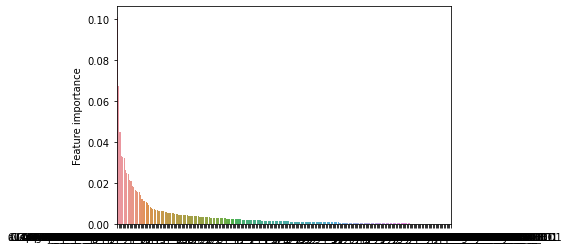

In [22]:
import seaborn as sns

ax_rf = sns.barplot(x=features2.index, y=features2.iloc[:,0], order=features2.index)
ax_rf.set_ylabel('Feature importance')
fig_rf = ax_rf.get_figure()

In [18]:
rf_top_features=features2.index[:2].tolist()
print(rf_top_features)

['mortality_diff', 'percent_severe_housing_cost_burden']


In [19]:
pdp, axes = partial_dependence(rf, X= data, features=[(0, 1)], grid_resolution=20)

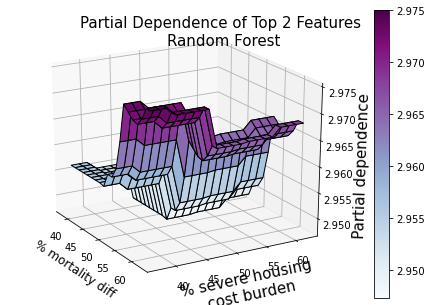

In [26]:
fig = plt.figure()
ax = Axes3D(fig)

XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].T

surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.BuPu, edgecolor='k')
#ax.set_xlabel('% Severe Housing \nCost Burden', fontsize=12)
#ax.set_ylabel('% Veteran', fontsize=15)
ax.set_xlabel('% mortality diff', fontsize=12)
ax.set_ylabel('% severe housing \ncost burden', fontsize=15)
ax.set_zlabel('Partial dependence', fontsize=15)
ax.view_init(elev=22, azim=330)
plt.colorbar(surf)
plt.suptitle('Partial Dependence of Top 2 Features \nRandom Forest', fontsize=15)
plt.subplots_adjust(top=0.9)
plt.show()

In [21]:
print(features2.index[range(14)])
datafeatures2 = pd.concat([states,y,data[features2.index[range(38)]]],axis=1)
datafeatures2.head(10)

Index(['mortality_diff', 'percent_severe_housing_cost_burden',
       'CLASS05_TOPIC61_VETERAN3_RESP054_BO1',
       'CLASS05_TOPIC61_VETERAN3_RESP046_BO1',
       'CLASS05_TOPIC39__CHLDCNT_RESP094_BO1', 'percent_black',
       'CLASS18_TOPIC42__RFPAP34_RESP188_BO1', 'segregation_index',
       'CLASS05_TOPIC02_AGE_RESP013_BO1',
       'CLASS07_TOPIC43_PERSDOC2_RESP050_BO1',
       'CLASS05_TOPIC22_EMPLOY1_RESP172_BO1',
       'CLASS04_TOPIC52__FS5YR_RESP212_BO1',
       'CLASS07_TOPIC36_CHECKUP1_RESP067_BO1',
       'CLASS05_TOPIC22_EMPLOY1_RESP027_BO1'],
      dtype='object')


,state,mortality_rate,mortality_diff,percent_severe_housing_cost_burden,CLASS05_TOPIC61_VETERAN3_RESP054_BO1,CLASS05_TOPIC61_VETERAN3_RESP046_BO1,CLASS05_TOPIC39__CHLDCNT_RESP094_BO1,percent_black,CLASS18_TOPIC42__RFPAP34_RESP188_BO1,segregation_index,...,CLASS07_TOPIC59__HCVU651_RESP054_BO1,CLASS01_TOPIC03_DRNKANY5_RESP046_BO1,percent_unemployed,CLASS05_TOPIC51_SEX_RESP001_BO1,percent_uninsured_2,CLASS03_TOPIC06__CASTHM1_RESP046_BO1,CLASS17_TOPIC54_USENOW3_RESP079_BO1,CLASS07_TOPIC59__HCVU651_RESP046_BO1,percent_native_hawaiian_other_pacific_islander,infant_mortality_rate
0,AL,2.630850,-0.916023,12.653817,86.62,13.38,13.91,26.497733,80.23,56.653988,...,16.22,42.91,3.933567,47.76,14.089710,10.46,3.810000,83.78,0.106529,8.365564
1,AK,2.941176,-2.185303,12.311926,84.68,15.32,15.51,3.371266,76.82,51.512262,...,12.46,54.59,6.587538,52.52,17.100623,9.19,2.920000,87.54,1.386015,5.812837
2,AZ,3.246753,-0.792113,14.235104,86.73,13.27,13.10,4.376610,78.01,45.659287,...,15.68,51.91,4.831881,49.25,13.992269,10.00,1.480000,84.32,0.275934,5.552345
3,AR,2.109375,-0.847806,11.691032,87.31,12.69,12.99,15.416954,80.12,64.346658,...,14.77,44.71,3.702410,48.60,11.358593,9.83,3.920000,85.23,0.361036,7.696352
4,CA,2.925657,-1.100523,20.165859,91.76,8.24,15.77,5.620425,79.25,55.428862,...,13.85,53.83,4.203527,49.21,10.138075,8.50,0.920000,86.15,0.505275,4.272680
5,CO,3.955112,-0.512380,14.119789,88.70,11.30,15.06,4.022165,76.72,62.117438,...,13.98,62.01,3.281526,49.94,10.238573,9.08,2.030000,86.02,0.191956,4.626141
6,CT,4.603241,3.943293,16.743438,91.37,8.63,14.37,10.212488,83.98,62.046244,...,9.08,61.31,4.106569,48.21,7.474604,10.28,0.490000,90.92,0.107483,4.780130
7,DE,2.153846,1.402023,13.679527,87.09,12.91,15.24,21.868315,83.03,42.866742,...,12.94,54.28,3.757371,47.77,7.267052,10.09,1.090000,87.06,0.108461,7.102697
8,DC,2.666667,1.754555,18.393253,93.44,6.56,12.71,44.890705,81.28,68.025633,...,5.89,66.71,5.553496,46.88,5.183141,11.62,2.485306,94.11,0.138799,7.660605
9,FL,2.317165,-0.553963,17.398819,86.49,13.51,13.84,15.537516,79.37,54.387924,...,20.89,53.07,3.567241,48.30,19.011262,8.74,1.150000,79.11,0.114337,6.127176


In [ ]:
features3 = pd.Series(ridge.coef_, index = data.columns)
features3.sort_values(ascending=False, inplace=True)
print(features3[:50])

In [ ]:
dataused = pd.concat([states,y,data],axis=1)
print(dataused.shape)
print(dataused.head(10))

In [ ]:
from joblib import dump, load

dump(rf_model, 'binary_rf.obj')
dump(gbc_model, 'binary_gbc.obj')

In [30]:
from sklearn.inspection import permutation_importance

# feature names 
feature_names = list(features2.columns)
# model - rf
model = load('binary_rf.obj')
# calculate permutation importance - all data - final model
perm_imp_all = permutation_importance(model, data, y, n_repeats=10, random_state=42)

print('Permutation Importances - mean')
print(perm_imp_all.importances_mean)



'''
# create dict of feature names and importances
fimp_dict_all = dict(zip(feature_names,perm_imp_all.importances_mean))

# feature importance - all
print('Permutation Importance for All Data')
print(fimp_dict_all)
# plot importances - all
y_pos = np.arange(len(feature_names))
plt.barh(y_pos, fimp_dict_all.importances_mean, align='center', alpha=0.5)
plt.yticks(y_pos, feature_names)
plt.xlabel('Permutation Importance - All')
plt.title('Feature Importance - All Data')
plt.show()
'''
'''
# calculate permutation importance - train
perm_imp_train = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)
# calculate permutation importance - test
perm_imp_test = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

# create dict of feature names and importances
fimp_dict_all = dict(zip(feature_names,perm_imp_all.importances_mean))

fimp_dict_train = dict(zip(feature_names,perm_imp_train.importances_mean))
fimp_dict_test = dict(zip(feature_names,perm_imp_test.importances_mean))  

# feature importance - all
print('Permutation Importance for All Data')
print(fimp_dict_all)
# plot importances - all
y_pos = np.arange(len(feature_names))
plt.barh(y_pos, fimp_dict_all.importances_mean, align='center', alpha=0.5)
plt.yticks(y_pos, feature_names)
plt.xlabel('Permutation Importance - All')
plt.title('Feature Importance - All Data')
plt.show()

# feature importance - train
print('Permutation Importance for Training Data')
print(fimp_dict_train)
# plot importances - train
y_pos = np.arange(len(feature_names))
plt.barh(y_pos, perm_imp_train.importances_mean, align='center', alpha=0.5)
plt.yticks(y_pos, feature_names)
plt.xlabel('Permutation Importance - Train')
plt.title('Feature Importance - Training Data')
plt.show()

# feature importance - test
print('Permutation Importance for Test Data')
print(fimp_dict_test)
# plot importances - test
y_pos = np.arange(len(feature_names))
plt.barh(y_pos, perm_imp_test.importances_mean, align='center', alpha=0.5)
plt.yticks(y_pos, feature_names)
plt.xlabel('Permutation Importance - Test Data')
plt.title('Feature Importance - Test')
plt.show()
'''

Permutation Importances - mean
[ 1.51818955e-03  6.52350779e-04  4.81189802e-05 -7.03394545e-05
  8.76802913e-04  1.36199381e-03  1.93953327e-04  2.83404796e-04
  2.78735468e-03  1.63441114e-03  2.07672467e-03  1.92329830e-03
  1.71900351e-04 -2.93366633e-05  7.22176866e-04  2.95886960e-04
  4.69823026e-04  9.91715990e-04  1.91926786e-04  5.56067317e-05
 -4.53754800e-05  0.00000000e+00  7.38236386e-04  7.29790943e-04
  7.13344632e-05  3.14971821e-04  2.07366302e-03  6.17876896e-04
  1.29008518e-04  2.52484378e-04  5.80500411e-05  3.71375465e-04
  5.98528978e-03  3.23369523e-03  0.00000000e+00  1.47889846e-04
  1.09855990e-03  7.12879365e-03  3.87191382e-04  9.79624916e-03
 -2.46702459e-05  3.19280267e-05  3.61551462e-04 -9.60405385e-05
  5.52147168e-04  1.17927244e-03  1.11113142e-03  1.88270265e-02
  7.10987620e-04  7.68246915e-03  2.68618235e-04  2.72915038e-04
  5.00054433e-04  3.95939145e-04  1.25847407e-04  1.69211620e-04
  3.32576386e-04  1.51404515e-03  3.33128865e-04  3.9637582

"\n# calculate permutation importance - train\nperm_imp_train = permutation_importance(model, X_train, y_train, n_repeats=10, random_state=42)\n# calculate permutation importance - test\nperm_imp_test = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)\n\n# create dict of feature names and importances\nfimp_dict_all = dict(zip(feature_names,perm_imp_all.importances_mean))\n\nfimp_dict_train = dict(zip(feature_names,perm_imp_train.importances_mean))\nfimp_dict_test = dict(zip(feature_names,perm_imp_test.importances_mean))  \n\n# feature importance - all\nprint('Permutation Importance for All Data')\nprint(fimp_dict_all)\n# plot importances - all\ny_pos = np.arange(len(feature_names))\nplt.barh(y_pos, fimp_dict_all.importances_mean, align='center', alpha=0.5)\nplt.yticks(y_pos, feature_names)\nplt.xlabel('Permutation Importance - All')\nplt.title('Feature Importance - All Data')\nplt.show()\n\n# feature importance - train\nprint('Permutation Importance for Trai

In [ ]:
dataused.to_excel(r'dataused_cj08292020.xlsx',index=None, header=True)

In [ ]:
#dataused.to_excel(r'/mnt/ChelseaFolder/AnalysisData/dataused_cj08292020.xlsx',index=None, header=True)